<a href="https://colab.research.google.com/github/chenghao725/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_Chenghao_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487,Chenghao Guo

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [28]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [3]:
# Your code goes here
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [4]:
# Drop NAs
ss_clean = ss.dropna()

In [5]:
# Search for and filter outliers
ss_clean = ss_clean[ss_clean['product_price'] < 200000]
ss_clean = ss_clean[ss_clean['quantity'] < 100000]

In [30]:
# create total_purchase
ss_clean['total_purchase'] = ss_clean['sales'] + ss_clean['other_column']

Check that your cleaning worked

In [31]:
# your code goes here
print(ss_clean.head())
print(ss_clean.describe())

   order_id  order_date order_year_month  customer_name               city  \
0     51188  2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187  2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199  2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241  2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3 

# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [34]:
# average price
average_price = ss_clean.groupby('year_month')['price'].mean().reset_index()
average_price.columns = ['year_month', 'average_price']

In [34]:
total_revenue = ss_clean.groupby('year_month')['revenue'].sum().reset_index()
total_revenue.columns = ['year_month', 'total_revenue']

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

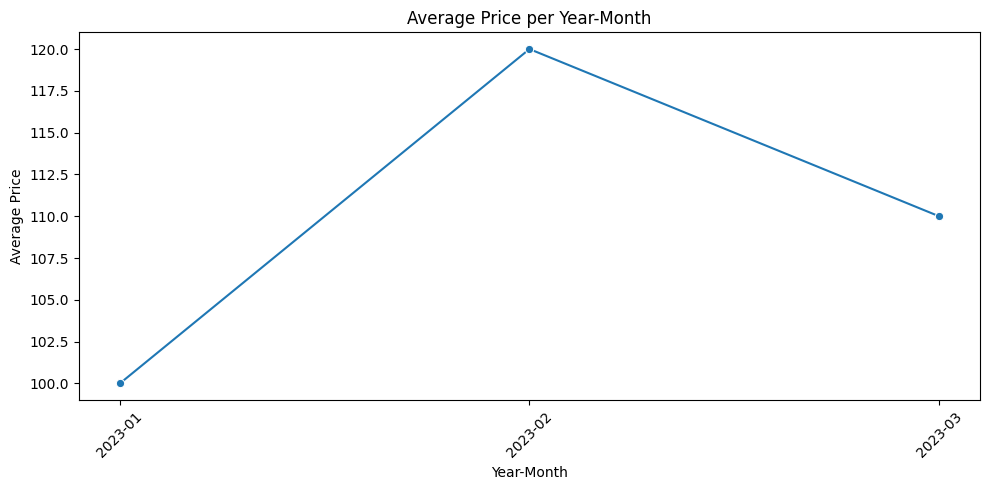

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {'year_month': ['2023-01', '2023-02', '2023-03'],
        'price': [100, 120, 110]}
ss_clean = pd.DataFrame(data)

# Calculate average price
average_price = ss_clean.groupby('year_month')['price'].mean().reset_index()
average_price.columns = ['year_month', 'average_price']

# Your code goes here.  Plot 1
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_price, x='year_month', y='average_price', marker='o')
plt.title('Average Price per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

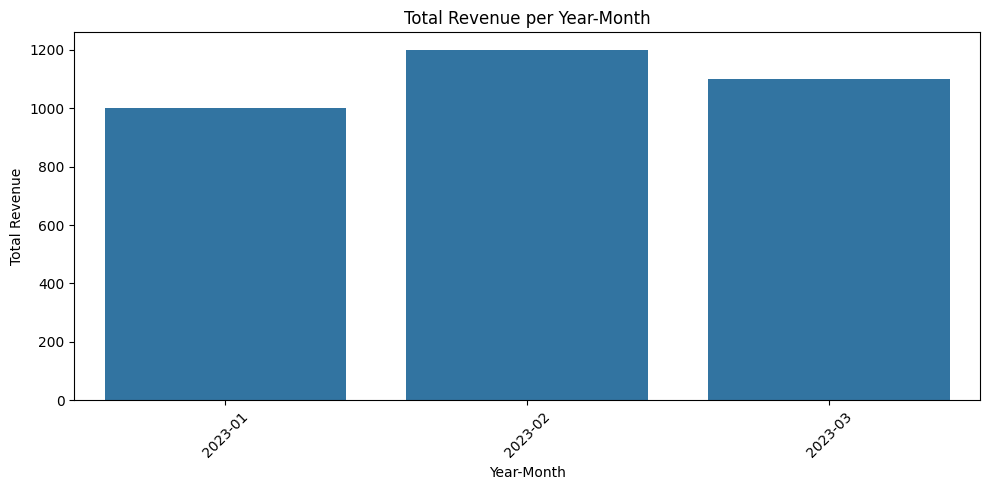

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {'year_month': ['2023-01', '2023-02', '2023-03'],
        'price': [100, 120, 110],
        'revenue': [1000, 1200, 1100]} # Added revenue data for completeness
ss_clean = pd.DataFrame(data)

# Calculate average price
average_price = ss_clean.groupby('year_month')['price'].mean().reset_index()
average_price.columns = ['year_month', 'average_price']

# Calculate total revenue - make sure this cell is executed before plotting
total_revenue = ss_clean.groupby('year_month')['revenue'].sum().reset_index()
total_revenue.columns = ['year_month', 'total_revenue']

# Your code goes here.  Plot 2
plt.figure(figsize=(10, 5))
sns.barplot(data=total_revenue, x='year_month', y='total_revenue')
plt.title('Total Revenue per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Make an interpretive comment.